<a href="https://colab.research.google.com/github/swadhasingh/FREE-openai-api-keys/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow scikit-learn matplotlib --quiet

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import cv2

In [5]:
from tensorflow.keras.datasets import fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#reshaping the 2D images

In [6]:
train_X = train_X / 255.0
test_X  = test_X / 255.0

train_X = train_X.reshape(-1, 28, 28, 1)
test_X  = test_X.reshape(-1, 28, 28, 1)


In [7]:
class_names = [
    'T-shirt/top','Trouser','Pullover','Dress','Coat',
    'Sandal','Shirt','Sneaker','Bag','Ankle boot'
]


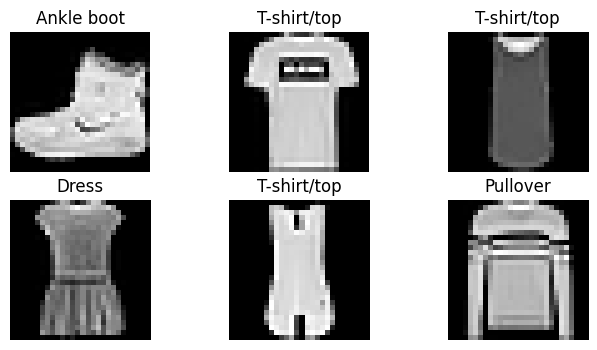

In [8]:
# ================================
# 5. VISUALIZE SAMPLE IMAGES
# ================================
plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(train_X[i].reshape(28,28), cmap='gray')
    plt.title(class_names[train_y[i]])
    plt.axis('off')
plt.show()

In [9]:

# 6. BUILD CNN MODEL

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:

# 7. COMPILE MODEL

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
# 8. TRAIN MODEL
history = model.fit(
    train_X,
    train_y,
    epochs=10,
    validation_split=0.2
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9924 - loss: 0.0201 - val_accuracy: 0.9090 - val_loss: 0.6770
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0216 - val_accuracy: 0.9090 - val_loss: 0.7102
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9934 - loss: 0.0191 - val_accuracy: 0.9081 - val_loss: 0.7199
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9943 - loss: 0.0172 - val_accuracy: 0.9078 - val_loss: 0.7102
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.0257 - val_accuracy: 0.9108 - val_loss: 0.7189
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9950 - loss: 0.0149 - val_accuracy: 0.9078 - val_loss: 0.7731
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9927 - loss: 0.0216 - val_accuracy: 0.9060 - val_loss: 0.7432
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9931 - loss: 0.0197 

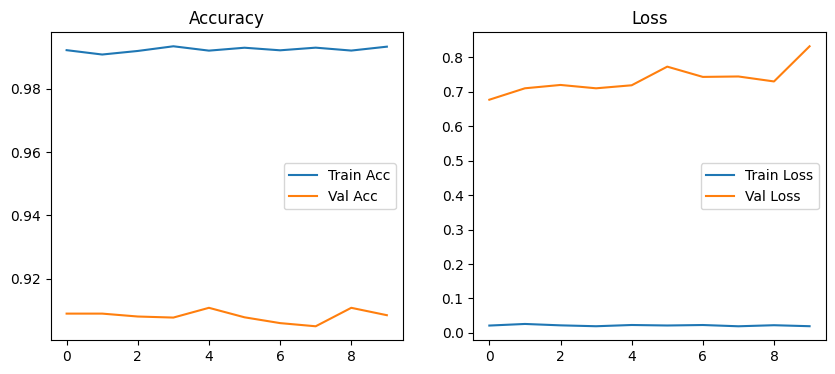

In [30]:

# 9. PLOT ACCURACY & LOSS

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [31]:
# 10. EVALUATION

pred = np.argmax(model.predict(test_X), axis=1)
true = test_y

print(confusion_matrix(true, pred))
print(classification_report(true, pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[841   0  21  11   3   0 112   0  12   0]
 [  3 979   2   8   3   0   5   0   0   0]
 [ 14   1 847   6  64   0  67   0   1   0]
 [ 15   4   9 902  28   0  35   0   7   0]
 [  3   0  42  23 893   0  37   0   2   0]
 [  0   0   0   0   0 981   0  12   0   7]
 [102   0  69  19  74   0 725   0  11   0]
 [  0   0   0   0   0  18   0 942   1  39]
 [  2   1   2   4   3   4   6   3 973   2]
 [  0   0   0   0   0   5   1  21   0 973]]
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.84      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.85      0.85      1000
       Dress       0.93      0.90      0.91      1000
        Coat       0.84      0.89      0.86      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.73      0.72      0.73      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.97      0.97      0.

In [32]:
# 11. SAVE MODEL

model.save('cnn_fashion_mnist.h5')

Saving dress.jpg to dress (2).jpg


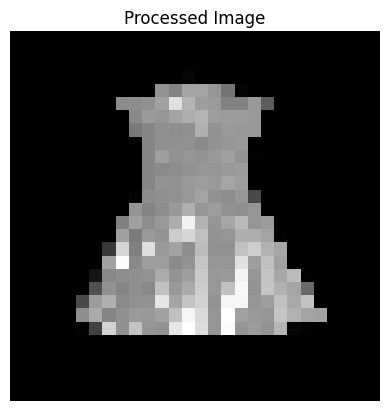

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: Dress


In [37]:
# 12. PREDICT CUSTOM IMAGE (OPTIONAL)

from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()


fname = list(uploaded.keys())[0]

# 🔹 READ IMAGE IN GRAYSCALE
img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)

# 🔹 INVERT COLORS (IMPORTANT FOR FASHION-MNIST)
img = 255 - img

# 🔹 RESIZE TO 28x28
img = cv2.resize(img, (28,28))

# 🔹 NORMALIZE
img = img / 255.0

# 🔹 RESHAPE FOR CNN
img = img.reshape(1,28,28,1)

# 🔹 SHOW PROCESSED IMAGE
plt.imshow(img.reshape(28,28), cmap='gray')
plt.title("Processed Image")
plt.axis('off')
plt.show()

# 🔹 PREDICT
pred_class = np.argmax(model.predict(img))
print("Prediction:", class_names[pred_class])
